# Continuação da Análise Exploratória

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

df = pd.read_csv('../../Dataset/notas_fiscais_cleaned.csv', encoding='latin-1')
df['Data_de_emissao'] = pd.to_datetime(df['Data_de_emissao'])
pd.set_option('display.max_columns', None)
month_names = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}
df.head(5)

,Numero,Data_de_emissao,Situacao,Valor_total_da_nota,CPF_CNPJ_emit,Bairro_distrito_emit,CEP_emit,Municipio_emit,CPF_CNPJ_dest,Bairro_distrito_dest,CEP_dest,Municipio_dest,Base_de_Calculo_do_ICMS,Valor_do_ICMS,Valor_total_dos_produtos,Valor_do_frete,Valor_do_seguro,Valor_desconto,Valor_outras_despesas_acessorias,Valor_do_IPI,Nr_item,Cod_prod,NCM_prod,CST_prod,CFOP_prod,Quant_prod,Valor_unit_prod,Valor_total_prod,Valor_desconto_item,BC_ICMS_prod,Valor_ICMS_prod,Aliq_ICMS_prod,Valor_IPI_prod,Aliq_IPI_prod,Valor_PMC_prod,Cod_EAN,Unid_prod
0,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,1,085213,39261000.0,0.0,5929.0,1.0,9.95,9.95,1.49,0.0,0.0,0.0,0.0,0.0,NaN,7.897833e+12,und
1,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,2,088949,96084000.0,0.0,5929.0,1.0,8.30,8.30,1.24,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und
2,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,3,082601,96084000.0,0.0,5929.0,1.0,6.95,6.95,1.04,0.0,0.0,0.0,0.0,0.0,NaN,7.898538e+12,und
3,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,4,083267,96082000.0,0.0,5929.0,1.0,3.70,3.70,0.55,0.0,0.0,0.0,0.0,0.0,NaN,3.154147e+12,und
4,8326,2016-02-04 14:30:38,a,45.99,11895653000100,centro,58900000.0,cajazeiras,12724621000105,francisco mesao francisco,58900000.0,nazarezinho,0.0,0.0,54.1,0.0,0.0,8.11,0.0,0.0,5,084814,84729040.0,0.0,5929.0,1.0,16.50,16.50,2.47,0.0,0.0,0.0,0.0,0.0,NaN,7.897477e+12,und


## Dados temporais

Text(0, 0.5, 'Quantidade de Registros')

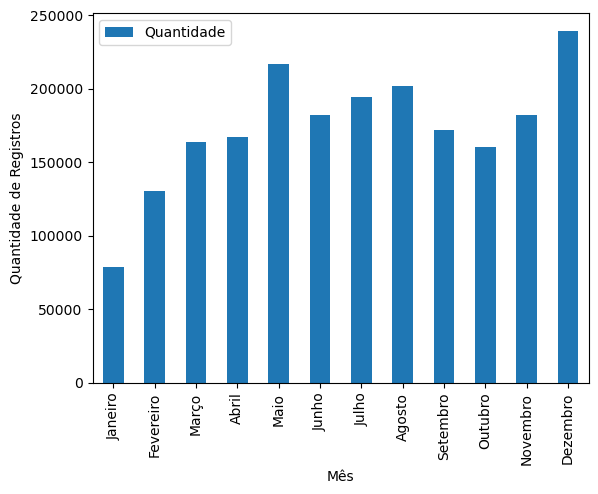

In [170]:
mes_count = df.groupby(df['Data_de_emissao'].dt.month).size().reset_index(name='Count')
mes_count['Mês'] = mes_count['Data_de_emissao'].map(month_names)
mes_count.plot.bar(x='Mês', y='Count', label='Quantidade')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Registros')

In [171]:
mes_count.describe()

,Data_de_emissao,Count
count,12.000000,12.000000
mean,6.500000,174107.916667
std,3.605551,41313.760942
min,1.000000,78779.000000
25%,3.750000,162850.500000
50%,6.500000,176852.000000
75%,9.250000,196461.750000
max,12.000000,239553.000000


Text(0, 0.5, 'Soma do Valor dos Produtos')

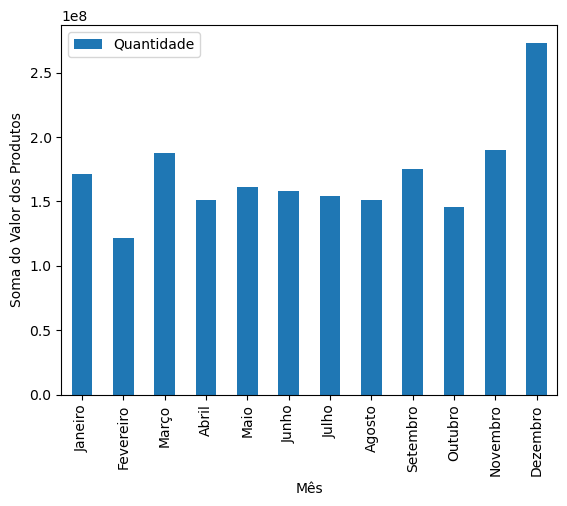

In [172]:
mes_valor = df.groupby(df['Data_de_emissao'].dt.month)['Valor_total_prod'].agg('sum')
df_mes_valor = pd.DataFrame({'Data_de_emissao': mes_valor.index, 'Sum': mes_valor.values})
df_mes_valor['Mês'] = df_mes_valor['Data_de_emissao'].map(month_names)
df_mes_valor.plot.bar(x='Mês', y='Sum', label='Quantidade')
plt.xlabel('Mês')
plt.ylabel('Soma do Valor dos Produtos')

In [173]:
df_mes_valor.describe()

,Data_de_emissao,Sum
count,12.000000,1.200000e+01
mean,6.500000,1.701162e+08
std,3.605551,3.746252e+07
min,1.000000,1.218077e+08
25%,3.750000,1.513261e+08
50%,6.500000,1.598116e+08
75%,9.250000,1.781476e+08
max,12.000000,2.732030e+08


Text(0, 0.5, 'Quantidade de Notas Fiscais')

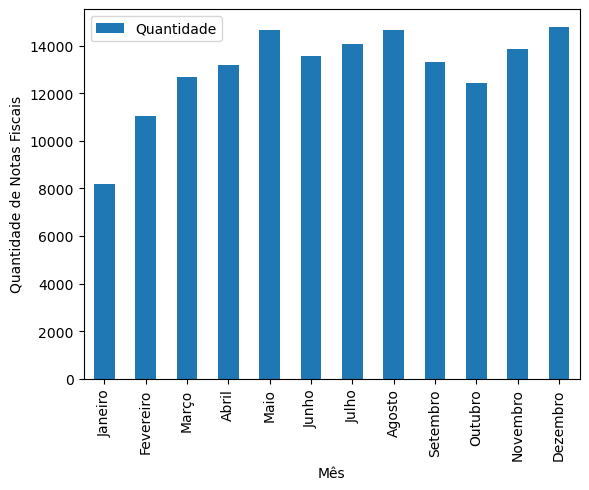

In [174]:
mes_nf = df.groupby(df['Data_de_emissao'].dt.month)['Numero'].nunique()
df_mes_nf = pd.DataFrame({'Mês Numero': mes_nf.index, 'Count': mes_nf.values})
df_mes_nf['Mês'] = df_mes_nf['Mês Numero'].map(month_names)
df_mes_nf.plot.bar(x='Mês', y='Count', label='Quantidade')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Notas Fiscais')

In [175]:
df_mes_nf.describe()

,Mês Numero,Count
count,12.000000,12.000000
mean,6.500000,13033.333333
std,3.605551,1872.502911
min,1.000000,8183.000000
25%,3.750000,12603.000000
50%,6.500000,13449.500000
75%,9.250000,14223.750000
max,12.000000,14792.000000


## Distribuição de valores zerados e não zerados para cada coluna

In [176]:
grouped = df.groupby('CPF_CNPJ_dest').size().reset_index(name='Count')
grouped = grouped.sort_values(by='Count', ascending=False)
grouped

,CPF_CNPJ_dest,Count
349,8778268000160,71719
348,8778250000169,37125
472,8907776000100,29733
1133,24513574000121,29175
574,9084815000170,23009
...,...,...
415,8806754001206,1
200,5074663000174,1
219,6075666000195,1
215,6070623000117,1


Text(0.5, 1.0, 'Valor Total da Nota')

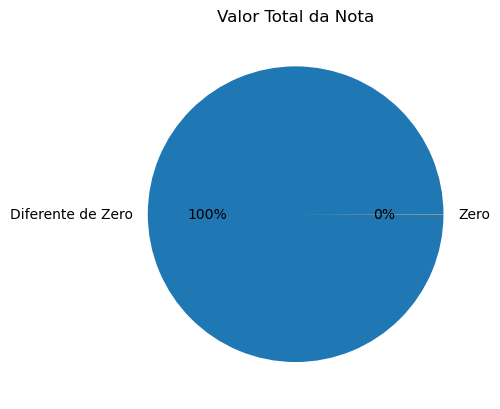

In [202]:
column = 'Valor_total_da_nota'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor Total da Nota')

Text(0.5, 1.0, 'Base de Cálculo do ICMS')

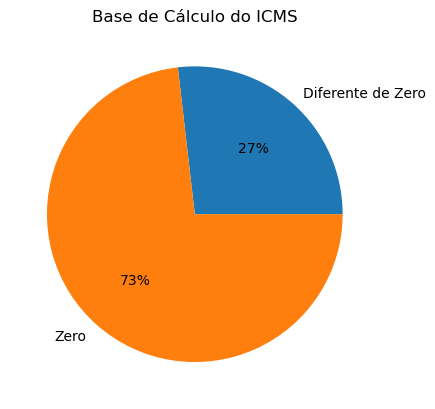

In [178]:
column = 'Base_de_Calculo_do_ICMS'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Base de Cálculo do ICMS')

Text(0.5, 1.0, 'Valor do ICMS')

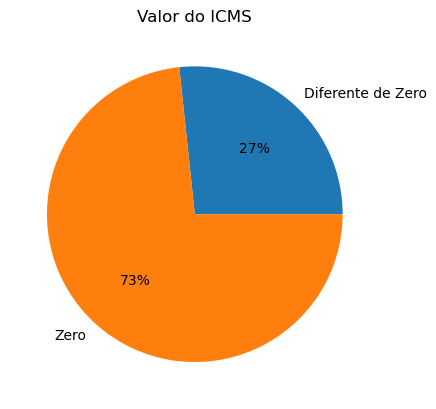

In [179]:
column = 'Valor_do_ICMS'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor do ICMS')

Text(0.5, 1.0, 'Valor Total dos Produtos')

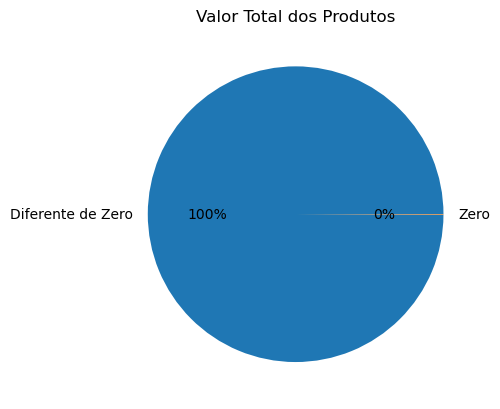

In [180]:
column = 'Valor_total_dos_produtos'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor Total dos Produtos')

Text(0.5, 1.0, 'Valor do Frete')

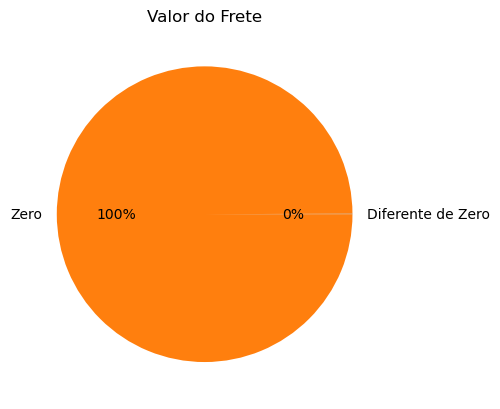

In [181]:
column = 'Valor_do_frete'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor do Frete')

Text(0.5, 1.0, 'Valor do Seguro')

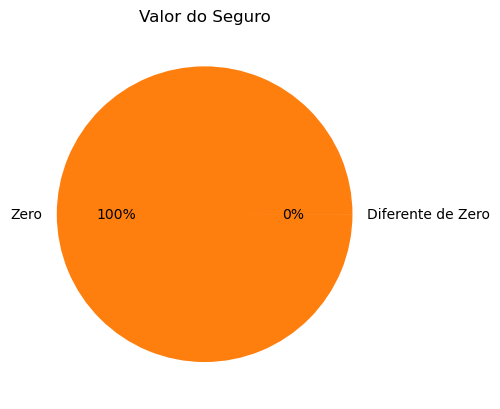

In [182]:
column = 'Valor_do_seguro'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor do Seguro')

Text(0.5, 1.0, 'Valor do Desconto')

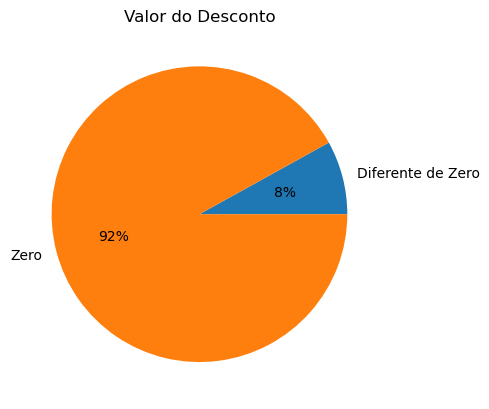

In [183]:
column = 'Valor_desconto'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor do Desconto')

Text(0.5, 1.0, 'Valor de Outras Despesas')

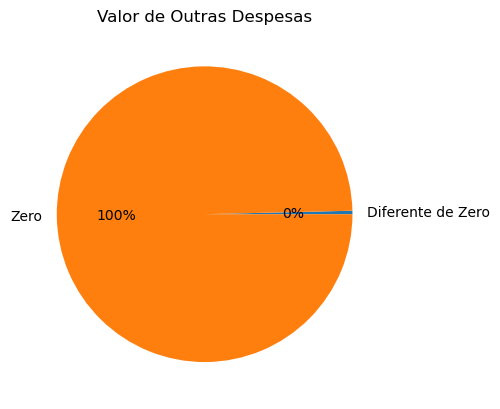

In [184]:
column = 'Valor_outras_despesas_acessorias'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor de Outras Despesas')

Text(0.5, 1.0, 'Valor do IPI')

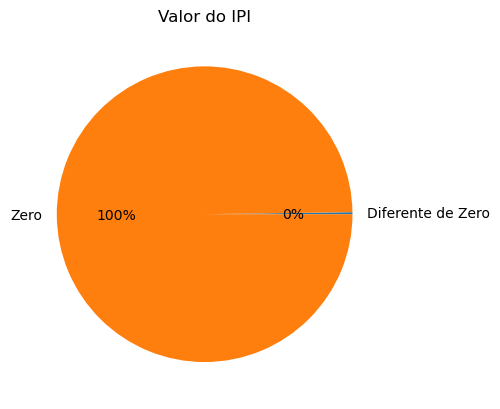

In [185]:
column = 'Valor_do_IPI'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor do IPI')

## Outras distribuições, correlações e boxplots

Text(0, 0.5, 'Valor Total dos Produtos')

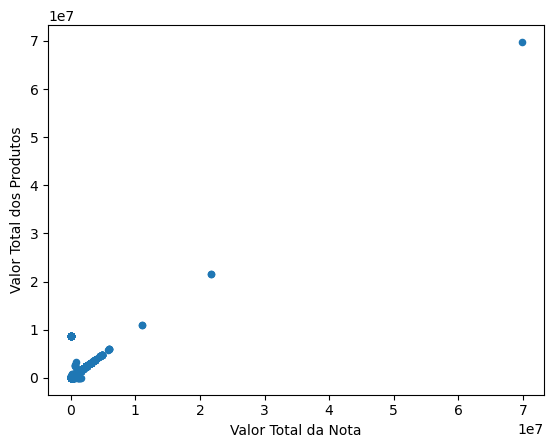

In [186]:
df.plot.scatter(x='Valor_total_da_nota', y='Valor_total_dos_produtos')
plt.xlabel('Valor Total da Nota')
plt.ylabel('Valor Total dos Produtos')

{'whiskers': [<matplotlib.lines.Line2D at 0x20597989040>,
 'caps': [<matplotlib.lines.Line2D at 0x205979895e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2059798fd30>,
 'medians': [<matplotlib.lines.Line2D at 0x20597989b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x20597989e50>,
 'means': []}

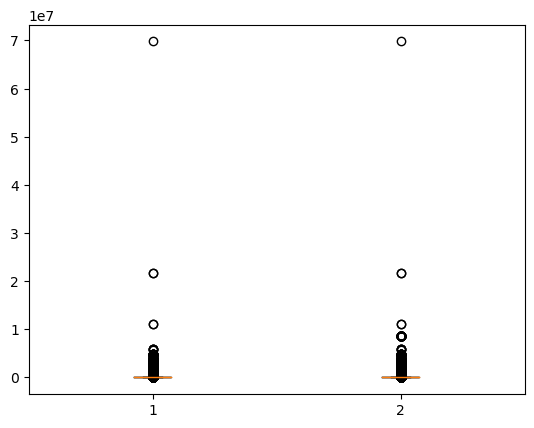

In [187]:
plt.boxplot([df['Valor_total_da_nota'], df['Valor_total_dos_produtos']])

Text(0, 0.5, 'Frequência')

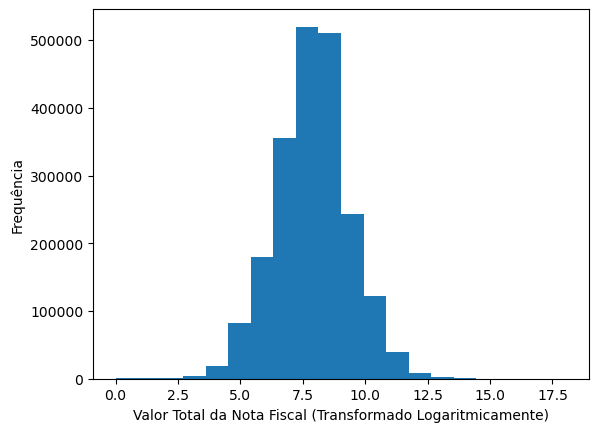

In [188]:
df['Novo_Valor_Total'] = np.maximum(df['Valor_total_da_nota'], 1)
df['Log_Valor_Total'] = np.log(df['Novo_Valor_Total'])
df['Log_Valor_Total'].plot.hist(bins=20)
plt.xlabel('Valor Total da Nota Fiscal (Transformado Logaritmicamente)')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

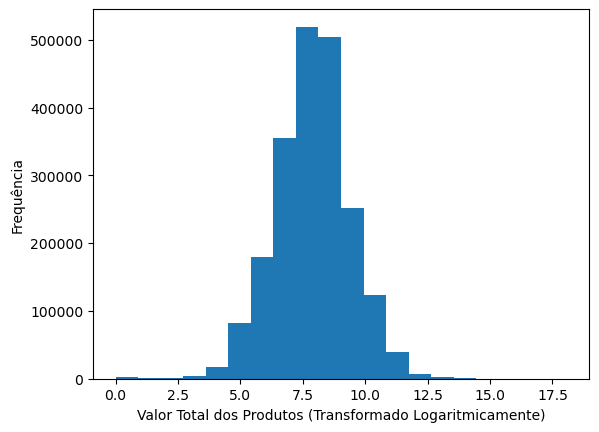

In [189]:
df['Novo_Valor_total_dos_produtos'] = np.maximum(df['Valor_total_dos_produtos'], 1)
df['Log_Valor_total_dos_produtos'] = np.log(df['Novo_Valor_total_dos_produtos'])
df['Log_Valor_total_dos_produtos'].plot.hist(bins=20)
plt.xlabel('Valor Total dos Produtos (Transformado Logaritmicamente)')
plt.ylabel('Frequência')

In [190]:
df['Novo_Valor_Total'].describe()

count    2.089295e+06
mean     8.888373e+03
std      7.163098e+04
min      1.000000e+00
25%      1.049440e+03
50%      2.783150e+03
75%      7.000000e+03
max      6.977796e+07
Name: Novo_Valor_Total, dtype: float64

<AxesSubplot:>

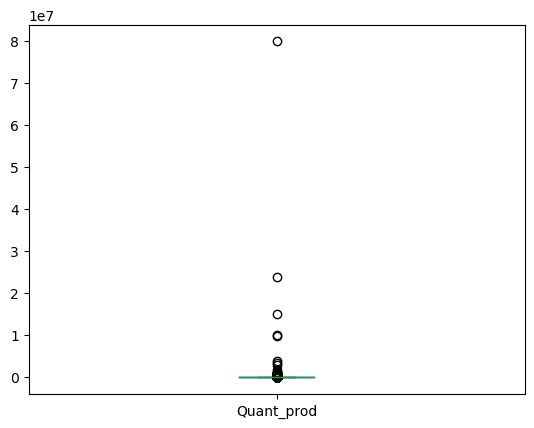

In [191]:
df['Quant_prod'].plot.box()

Text(0, 0.5, 'Frequência')

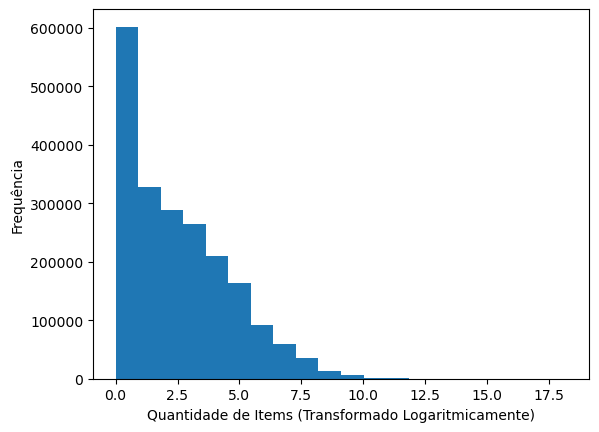

In [192]:
df['Novo_Quant_prod'] = np.maximum(df['Quant_prod'], 1)
df['Log_Quant_prod'] = np.log(df['Novo_Quant_prod'])
df['Log_Quant_prod'].plot.hist(bins=20)
plt.xlabel('Quantidade de Items (Transformado Logaritmicamente)')
plt.ylabel('Frequência')

In [193]:
df['Valor_unit_prod'].describe()

count    2.067032e+06
mean     1.903305e+02
std      4.889579e+04
min      0.000000e+00
25%      2.900000e+00
50%      7.000000e+00
75%      3.200000e+01
max      6.977796e+07
Name: Valor_unit_prod, dtype: float64

<AxesSubplot:>

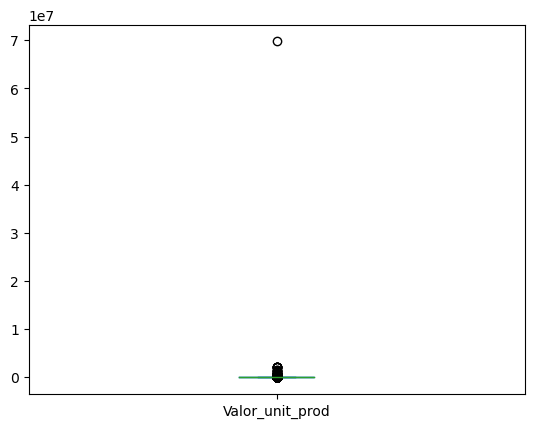

In [194]:
df['Valor_unit_prod'].plot.box()

Text(0, 0.5, 'Frequência')

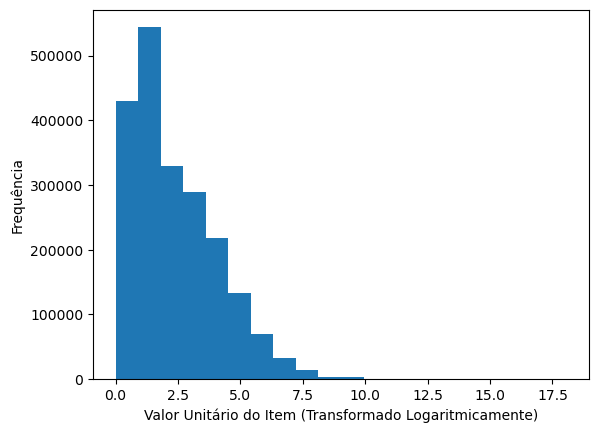

In [195]:
df['Novo_Valor_unit_prod'] = np.maximum(df['Valor_unit_prod'], 1)
df['Log_Valor_unit_prod'] = np.log(df['Novo_Valor_unit_prod'])
df['Log_Valor_unit_prod'].plot.hist(bins=20)
plt.xlabel('Valor Unitário do Item (Transformado Logaritmicamente)')
plt.ylabel('Frequência')

## Outras distriubuições de valores zerados e não zerados para colunas

Text(0.5, 1.0, 'Quantidade de Items')

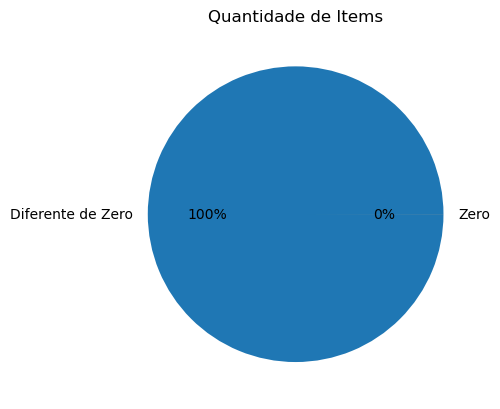

In [196]:
column = 'Quant_prod'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Quantidade de Items')

Text(0.5, 1.0, 'Valor Unitário do Item')

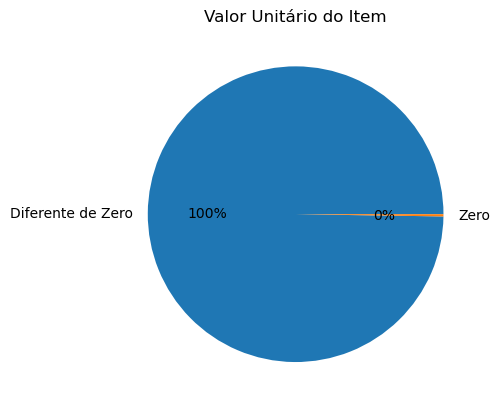

In [197]:
column = 'Valor_unit_prod'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor Unitário do Item')

Text(0.5, 1.0, 'Valor Total do Item')

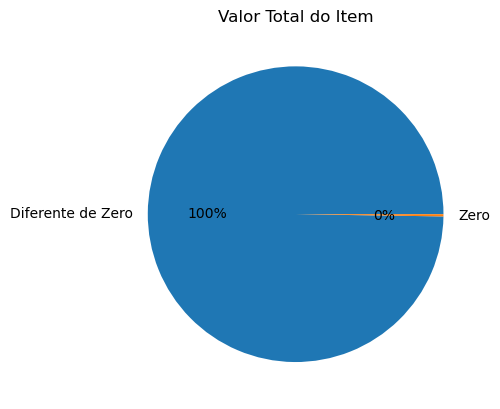

In [198]:
column = 'Valor_total_prod'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
plt.pie([count_non_zero, count_zero], labels=['Diferente de Zero', 'Zero'], autopct='%1.0f%%')
plt.title('Valor Total do Item')

## Correlação entre as variáveis principais

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Valor_total_da_nota'),
  Text(0, 1.5, 'Valor_total_dos_produtos'),
  Text(0, 2.5, 'Quant_prod'),
  Text(0, 3.5, 'Valor_unit_prod'),
  Text(0, 4.5, 'Valor_total_prod')])

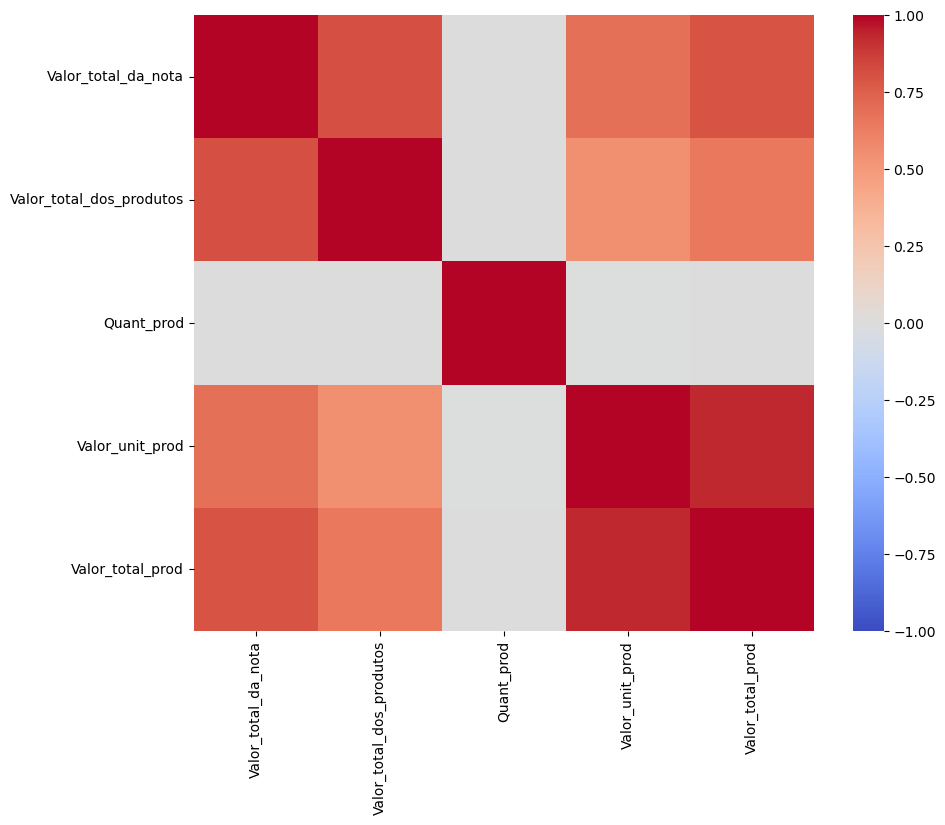

In [199]:
corr_matrix = df[['Valor_total_da_nota', 'Valor_total_dos_produtos', 'Quant_prod', 'Valor_unit_prod', 'Valor_total_prod']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [207]:
df_ratios = pd.DataFrame({
    'Coluna' : [],
    'Zeros' : [],
    'Não-Zeros' : []
})

df_ratios

,Coluna,Zeros,Não-Zeros


## Distribuição de valores zerados e não zerados para as colunas (resumo)

In [208]:
column = 'Valor_total_da_nota'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Base_de_Calculo_do_ICMS'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_do_ICMS'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_total_dos_produtos'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_do_frete'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_do_seguro'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_desconto'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_outras_despesas_acessorias'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_do_IPI'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Quant_prod'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_unit_prod'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

column = 'Valor_total_prod'
count_zero = (df[column] == 0).sum()
count_non_zero = (df[column] != 0).sum()
total = count_zero + count_non_zero
new_row = pd.DataFrame({'Coluna': [column], 'Zeros': [count_zero / total], 'Não-Zeros' : [count_non_zero / total]})
df_ratios = df_ratios.append(new_row, ignore_index=True)

df_ratios

C:\Users\breno\AppData\Local\Temp\ipykernel_18884\119471207.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratios = df_ratios.append(new_row, ignore_index=True)
C:\Users\breno\AppData\Local\Temp\ipykernel_18884\119471207.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratios = df_ratios.append(new_row, ignore_index=True)
C:\Users\breno\AppData\Local\Temp\ipykernel_18884\119471207.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratios = df_ratios.append(new_row, ignore_index=True)
C:\Users\breno\AppData\Local\Temp\ipykernel_18884\119471207.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratios = df_ratios.

,Coluna,Zeros,Não-Zeros
0,Valor_total_da_nota,0.000335,0.999665
1,Base_de_Calculo_do_ICMS,0.731693,0.268307
2,Valor_do_ICMS,0.733233,0.266767
3,Valor_total_dos_produtos,0.000635,0.999365
4,Valor_do_frete,0.999442,0.000558
5,Valor_do_seguro,0.999934,0.000066
6,Valor_desconto,0.919520,0.080480
7,Valor_outras_despesas_acessorias,0.996242,0.003758
8,Valor_do_IPI,0.997834,0.002166
9,Quant_prod,0.000059,0.999941


<AxesSubplot:title={'center':'Proporção de Registros Zerados e Não Zerados'}, ylabel='Coluna'>

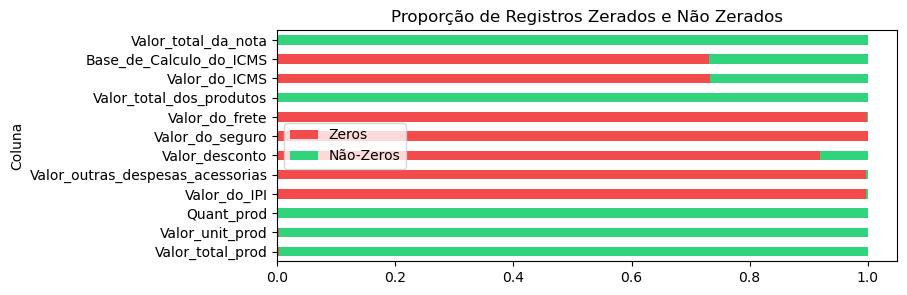

In [223]:
df_inverted = df_ratios.iloc[::-1]
colors = ['#f24b4b', '#31d47d']
df_inverted.plot.barh(x='Coluna', stacked=True, title='Proporção de Registros Zerados e Não Zerados', figsize=(8, 3), color=colors)